# visitors_profile_analysis

In [2]:
import pandas as pd


In [4]:
visitors_final = pd.read_csv("final_analysis_data_visitors.csv")

In [6]:
visitors_final

,visitor_id,email,gender,question,answer
0,67b70a9f2d21f543a1096602,emilijabss.mk,FEMALE,Reason for Attending the Event,To obtain general information
1,67b70a9f2d21f543a1096602,emilijabss.mk,FEMALE,Which of the following best describes your job...,Media
2,67b70a9f2d21f543a1096602,emilijabss.mk,FEMALE,Please indicate your company's main area of bu...,Travel Agent
3,67b70a9f2d21f543a1096602,emilijabss.mk,FEMALE,What role do you play in the purchasing decisi...,No influence
4,67ada1ee197e604dd2722d1b,aleksandar.dimkovbss.com.mk,MALE,Reason for Attending the Event,To source products and services
...,...,...,...,...,...
386,uud1nluegdqmisnfzpg75iqg,daniela.pbss.com.mk,MALE,What role do you play in the purchasing decisi...,Advisory role
387,mv0j9yovwhgmtif9l1naciko,daniela.pbss.com.mk,MALE,Reason for Attending the Event,To obtain general information
388,mv0j9yovwhgmtif9l1naciko,daniela.pbss.com.mk,MALE,Which of the following best describes your job...,Guided tour services
389,mv0j9yovwhgmtif9l1naciko,daniela.pbss.com.mk,MALE,Please indicate your company's main area of bu...,Travel Agent


C:\Users\hp\AppData\Local\Temp\ipykernel_6676\713607806.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')


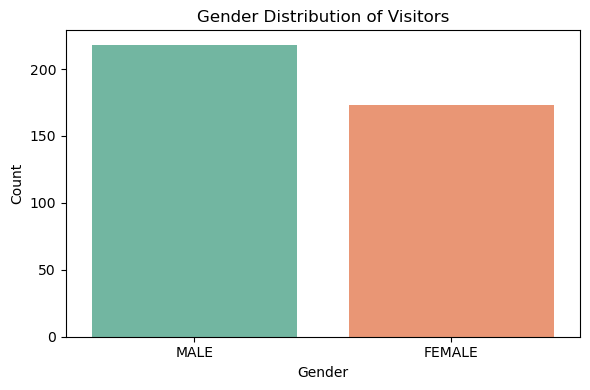

<Figure size 640x480 with 0 Axes>

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

gender_counts = visitors_final['gender'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')
plt.title('Gender Distribution of Visitors')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
plt.savefig("Gender Distribution of Visitors.png")

In [14]:
visitors = pd.read_csv("../source/visitors.csv")
visitors_answers = pd.read_csv("../source/visitors_answers.csv")
visitors_questions = pd.read_csv("../source/visitors_questions.csv")


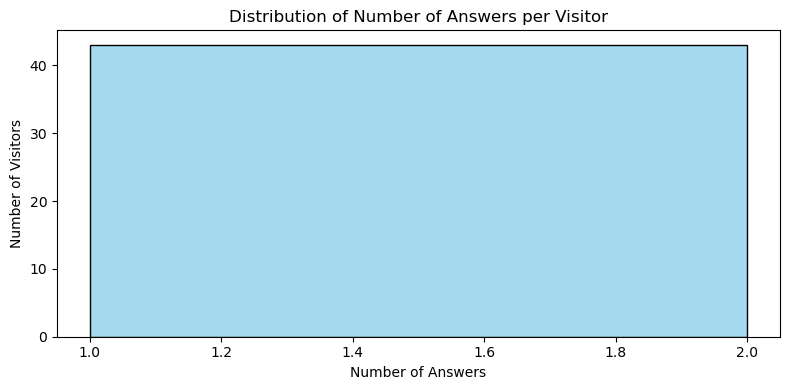

In [16]:
answers_per_visitor = visitors_answers.groupby('id').size()

plt.figure(figsize=(8, 4))
sns.histplot(answers_per_visitor, bins=range(1, answers_per_visitor.max()+2), kde=False, color='skyblue')
plt.title('Distribution of Number of Answers per Visitor')
plt.xlabel('Number of Answers')
plt.ylabel('Number of Visitors')
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_6676\2693006053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_questions['question'], x=question_counts.values, palette='viridis')


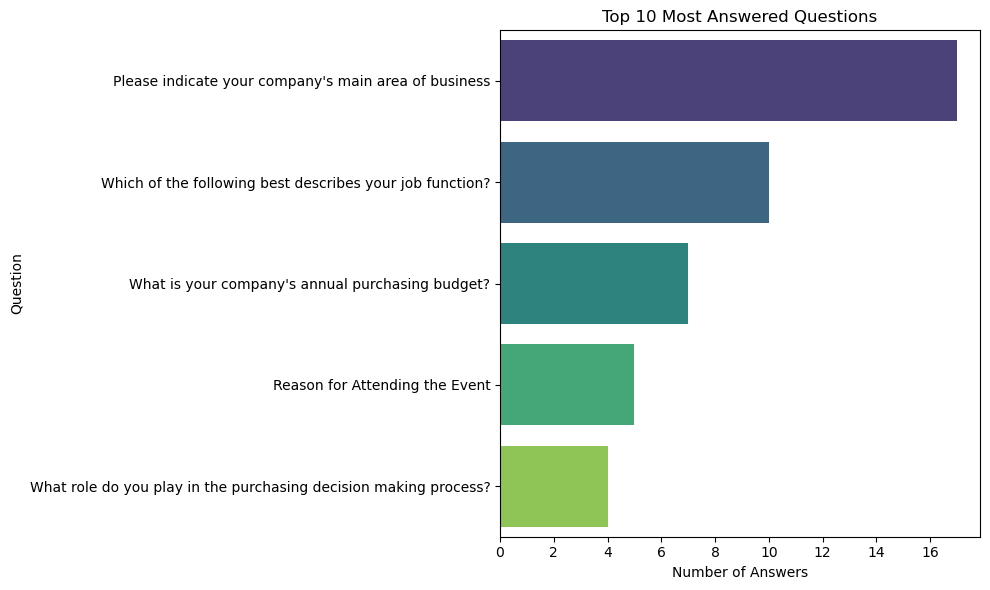

<Figure size 640x480 with 0 Axes>

In [51]:
question_counts = visitors_answers['questionId'].value_counts().head(10)
top_questions = visitors_questions.set_index('id').loc[question_counts.index]

plt.figure(figsize=(10, 6))
sns.barplot(y=top_questions['question'], x=question_counts.values, palette='viridis')
plt.title('Top 10 Most Answered Questions')
plt.xlabel('Number of Answers')
plt.ylabel('Question')
plt.tight_layout()
plt.show()
plt.savefig("Top 10 Most Answered Questions.png")

C:\Users\hp\AppData\Local\Temp\ipykernel_6676\1096789455.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=step_counts.index, y=step_counts.values, palette='coolwarm')


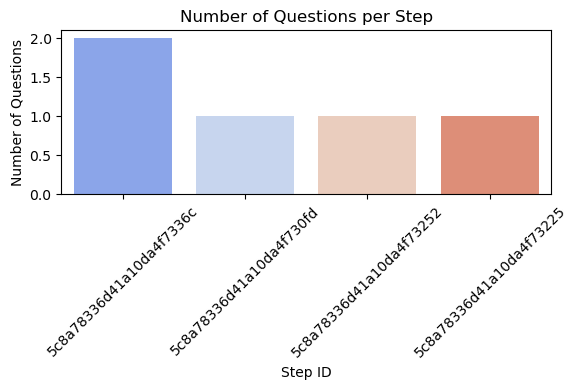

<Figure size 640x480 with 0 Axes>

In [53]:
step_counts = visitors_questions['stepId'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=step_counts.index, y=step_counts.values, palette='coolwarm')
plt.title('Number of Questions per Step')
plt.xlabel('Step ID')
plt.ylabel('Number of Questions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("Number of Questions per Stepid.png")

In [24]:
df=visitors_final.copy()

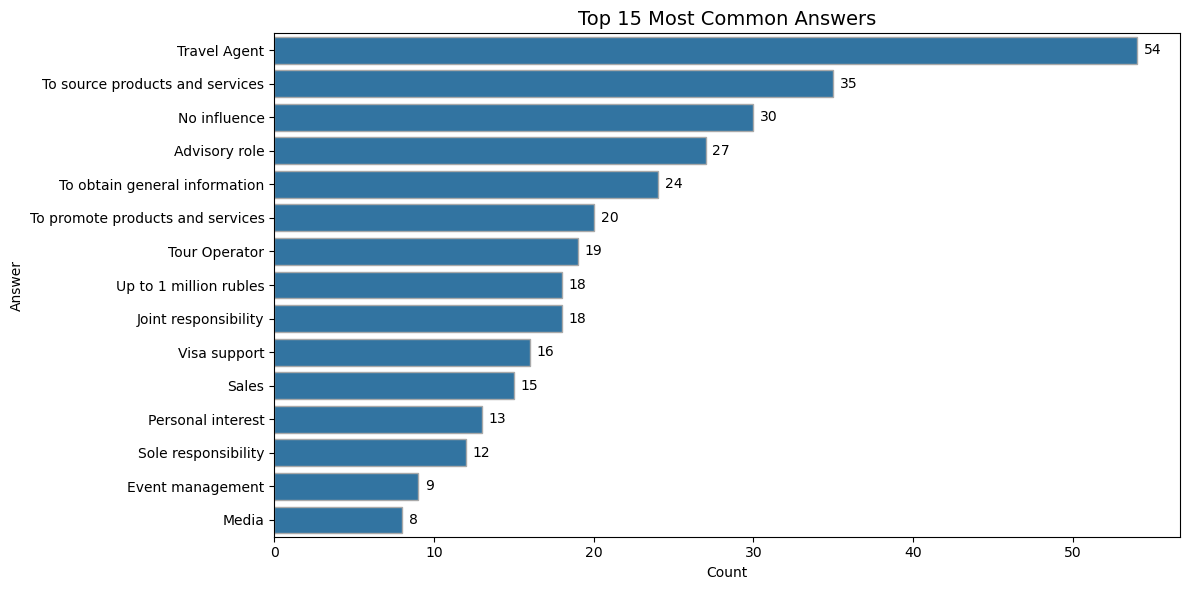

<Figure size 640x480 with 0 Axes>

In [55]:
plt.figure(figsize=(12, 6))
top_answers = df['answer'].value_counts().nlargest(15)
ax = sns.barplot(y=top_answers.index, x=top_answers.values, 
                 orient='h', edgecolor='darkgray')
plt.title('Top 15 Most Common Answers', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Answer')
for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}", 
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.tight_layout()

plt.show()

plt.savefig("Top 15 Most Common Answers.png")






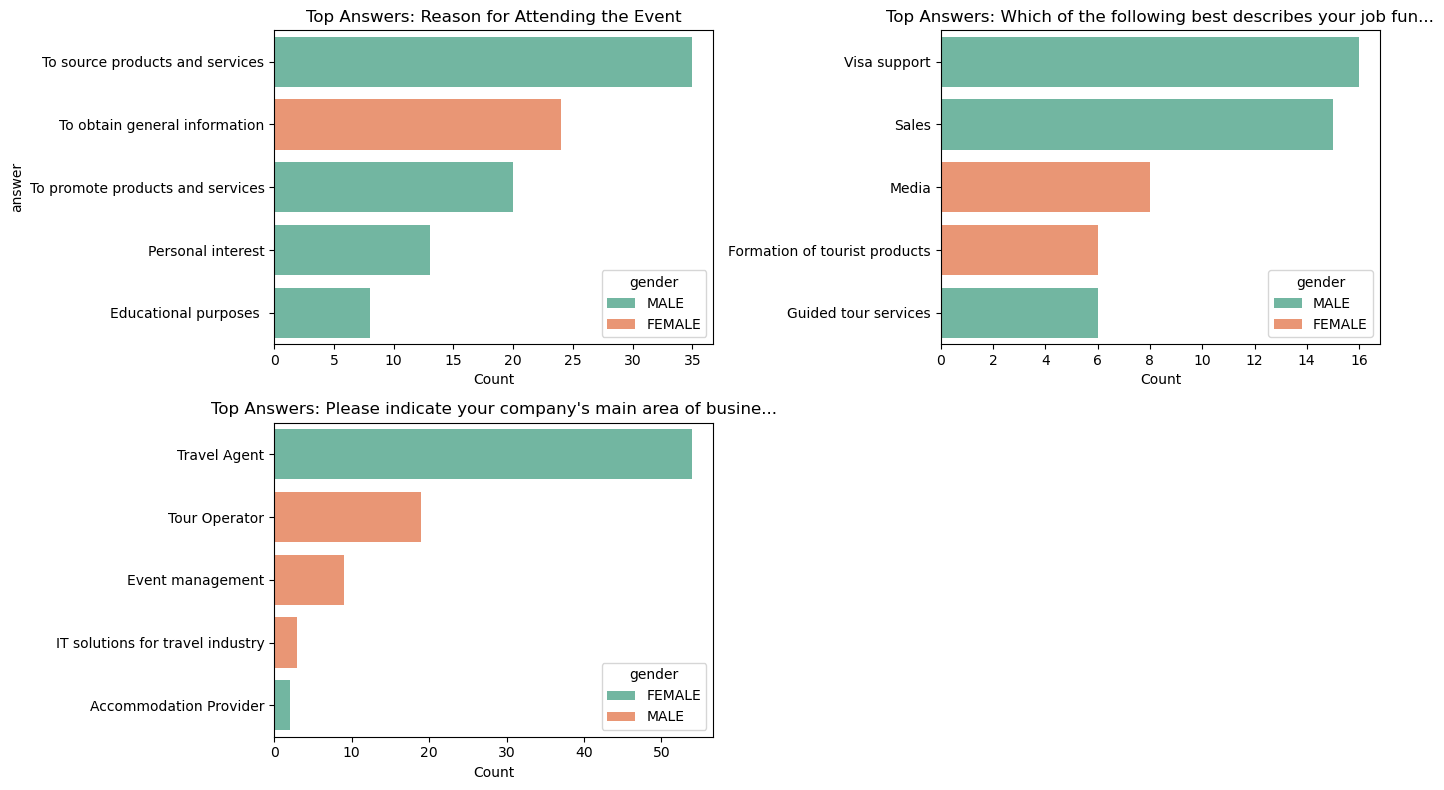

In [41]:


common_questions = df['question'].value_counts().nlargest(3).index

plt.figure(figsize=(14, 8))

for i, question in enumerate(common_questions, 1):
    plt.subplot(2, 2, i)
    temp_df = df[df['question'] == question]
    
    # Get top 5 answers
    top_answers = temp_df['answer'].value_counts().nlargest(5).index
    temp_df_top = temp_df[temp_df['answer'].isin(top_answers)]

    # Create a DataFrame: count of answers by gender
    answer_gender_counts = temp_df_top.groupby(['answer', 'gender']).size().unstack(fill_value=0)

    # Determine the most common gender for each answer
    dominant_gender = answer_gender_counts.idxmax(axis=1)

    # Prepare data for plotting
    plot_data = temp_df_top['answer'].value_counts().loc[top_answers].rename("count").reset_index()
    plot_data['gender'] = plot_data['answer'].map(dominant_gender)

    # Plot
    sns.barplot(
        data=plot_data,
        y='answer', x='count',
        hue='gender', dodge=False, palette='Set2', orient='h'
    )

    plt.title(f'Top Answers: {question[:50]}...' if len(question) > 50 else f'Top Answers: {question}')
    plt.xlabel('Count')
    if i != 1:
        plt.ylabel('')

plt.tight_layout()
plt.show()
